In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import itertools
import matplotlib.ticker as mticker
from scipy.optimize import brentq, curve_fit
from mpmath import zeta
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
from matplotlib.ticker import (LinearLocator, MaxNLocator)

font = {'weight': 'normal', 'family': 'DejaVu Sans'}
plt.rc('text', usetex = True)
plt.rc('font', **font)
plt.rcParams['font.size'] = 24

def func(x, a):
    return a*x

def format_power(x):
    
    power = int("{:.2e}".format(x).split('e')[1])
    val = float("{:.2e}".format(x).split('e')[0])
    
    return r'%.2f \cdot 10^{%d}' % (val, power)

def load_data_lifetime(q, dim):
    
    data = np.load('d=%d_q=%d/popdyn_scaling_lifetime_data.npz' % (dim, q), 
                    allow_pickle = True)
    
    return (data['sigvar_a'], data['q'], data['params'],
            data['alphas'])

def load_data_size(q, dim):
    
    data = np.load('d=%d_q=%d/popdyn_scaling_size_data.npz' % (dim, q), 
                    allow_pickle = True)
    
    return (data['sigvar_a'], data['q'], data['params'],
            data['betas'])


def save_fig(figs, figname):

    
    if (type(figs) is list):
        for q, fig in enumerate(figs):
            fig.savefig('%s_%d.svg' % (figname, q), bbox_inches = 'tight')
            fig.savefig('%s_%d.pdf' % (figname, q), bbox_inches = 'tight')
            fig.savefig('%s_%d.png' % (figname, q), bbox_inches = 'tight', dpi = 300)
    else:
        figs.savefig('%s.svg' % (figname), bbox_inches = 'tight')
        figs.savefig('%s.pdf' % (figname), bbox_inches = 'tight')
        figs.savefig('%s.png' % (figname), bbox_inches = 'tight', dpi = 300)

def set_size(w,h,ax):
    Bbox = ax.get_position()
        
    l = Bbox.x0
    r = Bbox.x1
    t = Bbox.y1
    b = Bbox.y0

    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)
    
    

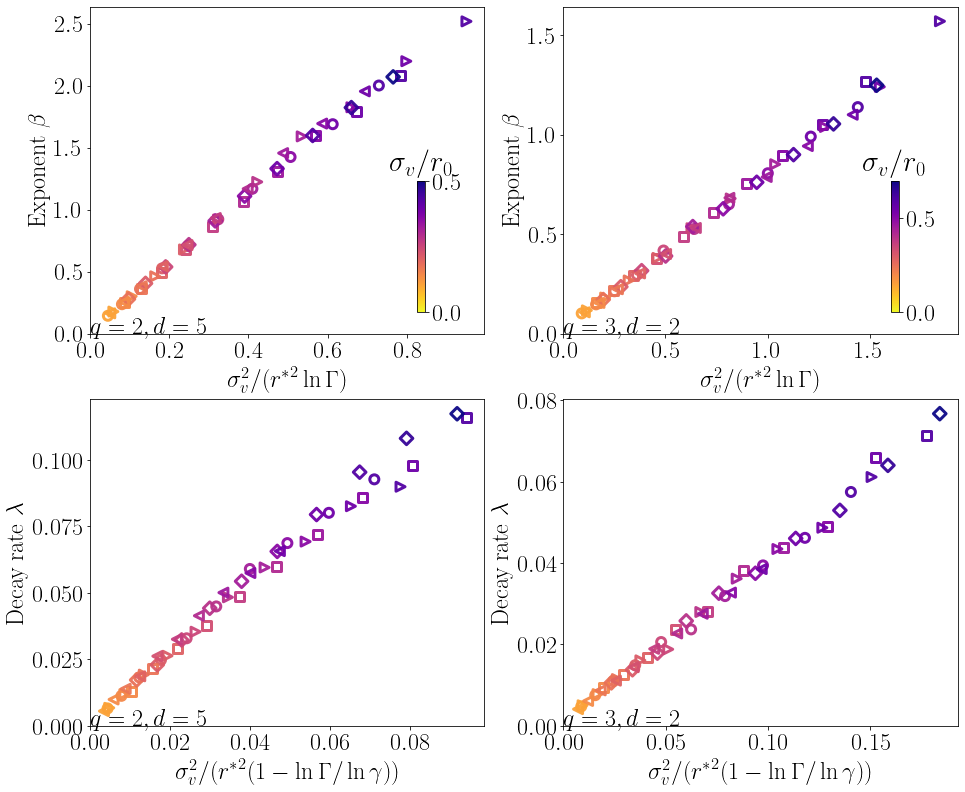

In [3]:
j0 = np.array([(np.pi)/2, 2.4048, np.pi, 3.83171, 4.49341, 5.13562, 5.76346, 6.38016, 6.98793, 7.58834,
               8.1825, 8.7714, 9.3558, 9.9361, 10.5128, 11.0863, 11.6570, 12.2250, 12.7907, 13.3543])


fig_a, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols = 2, nrows = 2)
set_size(5.48, 4.54, ax1)

(sigvar_a, q, params,
 betas) = load_data_size(2, 5)

nparams = len(params[:,0])

cmap_sigv = sns.color_palette("plasma_r", as_cmap = True)
norm = mpl.colors.Normalize(vmin  = 0, vmax = np.max(sigvar_a.flatten()))

Gamma = params[:,1]*(1 + params[:,0])
u = np.log(Gamma)
r_star = np.log(params[:,0]*params[:,1]/(1 - params[:,1]))**(1/q)

markers = ['o', 's', '>', 'D', '<', '^']

axins1 = inset_axes(ax1,
                    width="2%",
                    height="40%",
                    loc = 'lower right',
                    bbox_to_anchor =  (-0.12, 0.03, 1., 1.),
                    bbox_transform = ax1.transAxes)

axins1.set_title(r'$\sigma_v/r_0$', pad = 11)


for j in range(nparams):

    sigv = sigvar_a[j,:]
    dim = params[j,0]
    a = ax1.scatter((sigv/r_star[j])**2/(u[j]),
                betas[j,:] - 1, s = 9**2, c = sigv, cmap = cmap_sigv,
                marker = markers[j], alpha = 0.95, lw = 3, norm = norm)
    
    a.set_facecolor('none')
             
ax1.set_xlabel(r'$\sigma_v^2 /({r^*}^2 \ln \Gamma)$')
ax1.set_ylabel(r'Exponent $\beta$')
ax1.set_xlim(xmin = 0)
ax1.set_ylim(ymin = 0)
ax1.annotate(r'$q = 2, d = 5$', (0.0,0.0))

cb1 = mpl.colorbar.ColorbarBase(axins1, cmap = cmap_sigv,
                                norm = norm,
                                orientation = 'vertical')


(sigvar_a, q, params,
 alphas) = load_data_lifetime(2, 5)

nparams = len(params[:,0])

Gamma = params[:,1]*(1 + params[:,0])
u = 1 - np.log(Gamma)/np.log(params[:,1])
r_star = np.log(params[:,0]*params[:,1]/(1 - params[:,1]))**(1/q)

markers = ['o', 's', '>', 'D', '<', '^']



for j in range(nparams):

    sigv = sigvar_a[j,:]
    dim = params[j,0]
    a = ax3.scatter((sigv/r_star[j])**2/(u[j]),
                alphas[j,:], s = 9**2, c = sigv, cmap = cmap_sigv,
                marker = markers[j], alpha = 0.95, lw = 3, norm = norm)
    
    a.set_facecolor('none')
             
ax3.set_xlabel(r'$\sigma_v^2 /({r^*}^2 (1 - \ln \Gamma/\ln \gamma))$')
ax3.set_ylabel(r'Decay rate $\lambda$')
ax3.set_xlim(xmin = 0)
ax3.set_ylim(ymin = 0)
ax3.annotate(r'$q = 2, d = 5$', (0.0,0.0))

(sigvar_a, q, params,
 betas) = load_data_size(3, 2)

nparams = len(params[:,0])

cmap_sigv = sns.color_palette("plasma_r", as_cmap = True)
norm = mpl.colors.Normalize(vmin  = 0, vmax = np.max(sigvar_a.flatten()))

Gamma = params[:,1]*(1 + params[:,0])
u = np.log(Gamma)
r_star = np.log(params[:,0]*params[:,1]/(1 - params[:,1]))**(1/q)

markers = ['o', 's', '>', 'D', '<', '^']

axins2 = inset_axes(ax2,
                    width="2%",
                    height="40%",
                    loc = 'lower right',
                    bbox_to_anchor =  (-0.12, 0.03, 1., 1.),
                    bbox_transform = ax2.transAxes)

axins2.set_title(r'$\sigma_v/r_0$', pad = 11)


for j in range(nparams):

    sigv = sigvar_a[j,:]
    dim = params[j,0]
    a = ax2.scatter((sigv/r_star[j])**2/(u[j]),
                betas[j,:] - 1, s = 9**2, c = sigv, cmap = cmap_sigv,
                marker = markers[j], alpha = 0.95, lw = 3, norm = norm)
    
    a.set_facecolor('none')
             
ax2.set_xlabel(r'$\sigma_v^2 /({r^*}^2 \ln \Gamma)$')
ax2.set_ylabel(r'Exponent $\beta$')
ax2.set_xlim(xmin = 0)
ax2.set_ylim(ymin = 0)
ax2.annotate(r'$q = 3, d = 2$', (0.0,0.0))

cb1 = mpl.colorbar.ColorbarBase(axins2, cmap = cmap_sigv,
                                norm = norm,
                                orientation = 'vertical')


(sigvar_a, q, params,
 alphas) = load_data_lifetime(3, 2)

nparams = len(params[:,0])

Gamma = params[:,1]*(1 + params[:,0])
u = 1 - np.log(Gamma)/np.log(params[:,1])
r_star = np.log(params[:,0]*params[:,1]/(1 - params[:,1]))**(1/q)

markers = ['o', 's', '>', 'D', '<', '^']


for j in range(nparams):

    sigv = sigvar_a[j,:]
    dim = params[j,0]
    a = ax4.scatter((sigv/r_star[j])**2/(u[j]),
                alphas[j,:], s = 9**2, c = sigv, cmap = cmap_sigv,
                marker = markers[j], alpha = 0.95, lw = 3, norm = norm)
    
    a.set_facecolor('none')
             
ax4.set_xlabel(r'$\sigma_v^2 /({r^*}^2 (1 - \ln \Gamma/\ln \gamma))$')
ax4.set_ylabel(r'Decay rate $\lambda$')
ax4.set_xlim(xmin = 0)
ax4.set_ylim(ymin = 0)
ax4.annotate(r'$q = 3, d = 2$', (0.0,0.0))

save_fig(fig_a, 'figS1')

plt.show()

